<a href="https://colab.research.google.com/github/kodeu/trading-prophet/blob/prophet_iter1/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/vbdy43ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/6b27hz0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26285', 'data', 'file=/tmp/tmpnfb7llhz/vbdy43ui.json', 'init=/tmp/tmpnfb7llhz/6b27hz0o.json', 'output', 'file=/tmp/tmpnfb7llhz/prophet_modelvs8ix_ws/prophet_model-20240518035015.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:50:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving klines_btcusdt_1000.json to klines_btcusdt_1000 (42).json
User uploaded file "klines_btcusdt_1000 (42).json" with length 187508 bytes


03:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/own95xjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfb7llhz/p5z1q6nw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88083', 'data', 'file=/tmp/tmpnfb7llhz/own95xjt.json', 'init=/tmp/tmpnfb7llhz/p5z1q6nw.json', 'output', 'file=/tmp/tmpnfb7llhz/prophet_modeluo_mq7i1/prophet_model-20240518035015.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:50:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:50:16 - cmdstanpy - INFO - Chain [1]

50
50


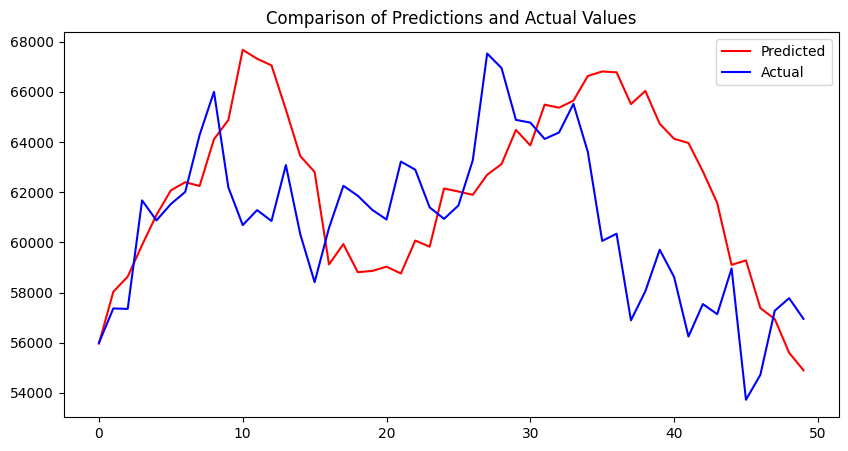

In [73]:
import numpy as np
import tensorflow as tf
import json
from google.colab import files
import pandas as pd
from prophet import Prophet
import datetime

dataext = []
data = []
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
filename = list(uploaded.keys())[0]  # Adjust as per actual file name if needed


# Load the JSON data from the file
with open(filename, 'r') as file:
    rawdata = json.load(file)

rawdata = np.array(rawdata)
rawdata = rawdata[:100]
rawdata = rawdata[:, [6, 4]]
rawdata = rawdata.astype(np.float64)

#only keep close price and close date
rawdata_df = pd.DataFrame(rawdata)
rawdata_df.columns = ['ds','y']
rawdata_df['ds'] = pd.to_datetime(rawdata_df['ds'], unit='ms')
rawdata_df['ds'] = rawdata_df['ds'].dt.strftime('%Y-%m-%d')
predictions = []

df = rawdata_df[:int(len(rawdata) / 2)]
for i in range(int(len(rawdata) / 2)):
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)
    predictions.append(forecast.tail(1)['yhat'])
    df = pd.concat([df, rawdata_df[int(len(rawdata) / 2):int(len(rawdata) / 2)+i+1]])

# Compare predictions with actual outcomes
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
print(len(rawdata_df[: int(len(rawdata_df) / 2)]['y']))
print(len(predictions))
x = np.arange(len(predictions))
plt.plot(x, predictions, 'r-', label='Predicted')
plt.plot(x, rawdata_df[int(len(rawdata_df) / 2) : len(rawdata_df)]['y'], 'b-', label='Actual')
plt.title('Comparison of Predictions and Actual Values')
plt.legend()
plt.show()

# Predict future values
#forecast = model.predict(future)

# Plot the forecast
#fig = model.plot(forecast)
